
# Tutorial for Human Pose Estimation


In[1]:



In [2]:
import yaml
import torch
import torch.nn as nn
from tqdm import tqdm
import os

In [1]:
!git clone https://github.com/EmanuelMariaFaraci/mmDiffCorrect.git


Cloning into 'mmDiffCorrect'...
remote: Enumerating objects: 578, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 578 (delta 32), reused 42 (delta 32), pack-reused 516 (from 1)
Receiving objects: 100% (578/578), 683.51 KiB | 2.74 MiB/s, done.
Resolving deltas: 100% (256/256), done.


In [1]:
%cd /content/mmDiffCorrect

/content/mmDiffCorrect


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.flush_and_unmount()
print("All changes saved to Drive.")

All changes saved to Drive.


In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:09
🔁 Restarting kernel...


In [3]:
!conda env create -f environment.yml

Channels:
 - pytorch
 - nvidia
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



pytorch-1.13.0       | 1.27 GB   | :   0% 0/1 [00:00<?, ?it/s]
nsight-compute-2022. | 610.0 MB  | :   0% 0/1 [00:00<?, ?it/s]

libcublas-dev-11.11. | 394.1 MB  | :   0% 0/1 [00:00<?, ?it/s]


libcublas-11.11.3.6  | 364.0 MB  | :   0% 0/1 [00:00<?, ?it/s]



libcusparse-dev-11.7 | 359.7 MB  | :   0% 0/1 [00:00<?, ?it/s]




libcufft-dev-10.9.0. | 275.8 MB  | :   0% 0/1 [00:00<?, ?it/s]





libcusparse-11.7.5.8 | 176.3 MB  | :   0% 0/1 [00:00<?, ?it/s]






libnpp-11.8.0.86     | 147.8 MB  | :   0% 0/1 [00:00<?, ?it/s]







libnpp-dev-11.8.0.86 | 144.5 MB  | :   0% 0/1 [00:00<?, ?it/s]








libcufft-10.9.0.58   | 142.8 MB  | :   0% 0/1 [00:00<?, ?it/s]









mkl-2021.4.0     

In [ ]:
!conda env remove -n mmDiff
!conda env create -f environment.yml


Remove all packages in environment /usr/local/envs/mmDiff:


## Package Plan ##

  environment location: /usr/local/envs/mmDiff


The following packages will be REMOVED:

  _libgcc_mutex-0.1-main
  _openmp_mutex-5.1-1_gnu
  absl-py-1.3.0-py39h06a4308_0
  aiohttp-3.8.3-py39h5eee18b_0
  aiosignal-1.2.0-pyhd3eb1b0_0
  async-timeout-4.0.2-py39h06a4308_0
  attrs-22.1.0-py39h06a4308_0
  blas-1.0-mkl
  blinker-1.4-py39h06a4308_0
  bottleneck-1.3.5-py39h7deecbd_0
  brotli-1.0.9-h5eee18b_7
  brotli-bin-1.0.9-h5eee18b_7
  brotlipy-0.7.0-py39h27cfd23_1003
  bzip2-1.0.8-h7b6447c_0
  c-ares-1.18.1-h7f8727e_0
  ca-certificates-2022.10.11-h06a4308_0
  cachetools-4.2.2-pyhd3eb1b0_0
  certifi-2022.12.7-py39h06a4308_0
  cffi-1.15.1-py39h5eee18b_2
  charset-normalizer-2.0.4-pyhd3eb1b0_0
  click-8.0.4-py39h06a4308_0
  contourpy-1.0.5-py39hdb19cb5_0
  cryptography-38.0.1-py39h9ce1e76_0
  cuda-11.6.2-0
  cuda-cccl-11.6.55-hf6102b2_0
  cuda-command-line-tools-11.6.2-0
  cuda-compiler-11.6.2-0
  cuda-cudart-

In [4]:
# Remove the old environment
!conda env remove -n mmDiff

# Create the new clean environment
!conda env create -f environment_clean.yml

Output streaming troncato alle ultime 5000 righe.















 ... (more hidden) ...

















pytorch-1.13.0       | 1.27 GB   | :  97% 0.9729060183084512/1 [00:40<00:03, 123.64s/it]
















libllvm21-21.1.0     | 42.3 MB   | :  12% 0.11559599360368739/1 [00:40<00:35, 40.41s/it]  


















 ... (more hidden) ...

















pytorch-1.13.0       | 1.27 GB   | :  98% 0.9756609383972287/1 [00:40<00:02, 92.59s/it] 
















libllvm21-21.1.0     | 42.3 MB   | :  19% 0.18982856457602337/1 [00:40<00:15, 19.22s/it]


















 ... (more hidden) ...

















pytorch-1.13.0       | 1.27 GB   | :  98% 0.9773857579310719/1 [00:40<00:01, 84.63s/it]
















libllvm21-21.1.0     | 42.3 MB   | :  25% 0.2485498520616026/1 [00:40<00:09, 12.56s/it] 


















 ... (more hidden) ...

















pytorch-1.13.0       | 1.27 GB   | :  98% 0.979134533291774/1 [00:40<00:01, 77.40s/it] 
















libllvm21-21.1.0     | 42.3 MB   |

In [5]:
!conda activate mmDiff
%cd pointnet2_local
!python setup.py build_ext --inplace
!pip install -e .


CondaError: Run 'conda init' before 'conda activate'

/content/mmDiffCorrect/pointnet2_local
running build_ext
Obtaining file:///content/mmDiffCorrect/pointnet2_local
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 47.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 163.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 152.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.8/899.8 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 185.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!conda env remove -n mmDiff -y
!conda clean --all -y


Remove all packages in environment /usr/local/envs/mmDiff:


## Package Plan ##

  environment location: /usr/local/envs/mmDiff


The following packages will be REMOVED:

  _libgcc_mutex-0.1-main
  _openmp_mutex-5.1-1_gnu
  absl-py-1.3.0-py39h06a4308_0
  aiohttp-3.8.3-py39h5eee18b_0
  aiosignal-1.2.0-pyhd3eb1b0_0
  async-timeout-4.0.2-py39h06a4308_0
  attrs-22.1.0-py39h06a4308_0
  blas-1.0-mkl
  blinker-1.4-py39h06a4308_0
  bottleneck-1.3.5-py39h7deecbd_0
  brotli-1.0.9-h5eee18b_7
  brotli-bin-1.0.9-h5eee18b_7
  brotlipy-0.7.0-py39h27cfd23_1003
  bzip2-1.0.8-h7b6447c_0
  c-ares-1.18.1-h7f8727e_0
  ca-certificates-2022.10.11-h06a4308_0
  cachetools-4.2.2-pyhd3eb1b0_0
  certifi-2022.12.7-py39h06a4308_0
  cffi-1.15.1-py39h5eee18b_2
  charset-normalizer-2.0.4-pyhd3eb1b0_0
  click-8.0.4-py39h06a4308_0
  contourpy-1.0.5-py39hdb19cb5_0
  cryptography-38.0.1-py39h9ce1e76_0
  cuda-11.6.2-0
  cuda-cccl-11.6.55-hf6102b2_0
  cuda-command-line-tools-11.6.2-0
  cuda-compiler-11.6.2-0
  cuda-cudart-

In [ ]:
import os
import torch

# 1. Imposta l'architettura GPU corretta per Colab (T4 = 7.5)
# Questo evita che il compilatore provi a costruire per schede che non hai, risparmiando tempo ed errori.
#os.environ["TORCH_CUDA_ARCH_LIST"] = "7.5"
#os.environ["FORCE_CUDA"] = "1"

# 2. Installa Ninja (un compilatore veloce richiesto spesso da questi progetti)
!conda install -y ninja

Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - ninja


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2025.11.12         |     pyhd8ed1ab_0         153 KB  conda-forge
    conda-24.11.3              |  py311h38be061_0         1.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.3 MB

The following NEW packages will be INSTALLED:

  ninja              conda-forge/linux-64::ninja-1.13.2-h171cf75_0 

The following packages will be UPDATED:

  ca-certificates    conda-forge/linux-64::ca-certificates~ --> conda-forge/noarch::ca-certificates-2025.11.12-hbd8a1cb_0 
  certifi                           2024.12.14-pyhd8ed1ab_0 --> 2025.11.12-pyhd8ed1ab_0 
  conda           

In [ ]:
!conda activate mmDiff
%cd /content/mmDiffCorrect/pointnet2_local/pointnet2_ops_lib
!python -c "import pointnet2_ops; print('PointNet2 installed successfully')"


CondaError: Run 'conda init' before 'conda activate'

/content/mmDiffCorrect/pointnet2_local/pointnet2_ops_lib
/content/mmDiffCorrect/pointnet2_local/pointnet2_ops_lib/pointnet2_ops/pointnet2_utils.py:15: UserWarning: Unable to load pointnet2_ops cpp extension. JIT Compiling.
  warnings.warn("Unable to load pointnet2_ops cpp extension. JIT Compiling.")
PointNet2 installed successfully


In [ ]:
!conda activate mmDiff
#%cd /content/mmDiffCorrect/pointnet2_local/pointnet2_ops_lib/

!python -c "import pointnet2_ops._ext; print('SUCCESS')"


CondaError: Run 'conda init' before 'conda activate'

SUCCESS


In [ ]:
!conda list | grep pointnet2

pointnet2                 3.0.0                    pypi_0    pypi


In [ ]:
!conda activate mmDiff
%cd /content/mmDiffCorrect/pointnet2_local/pointnet2_ops_lib
!python setup.py build_ext --inplace


CondaError: Run 'conda init' before 'conda activate'

/content/mmDiffCorrect/pointnet2_local/pointnet2_ops_lib
running build_ext
W1230 15:41:16.544000 20037 site-packages/torch/utils/cpp_extension.py:521] The detected CUDA version (12.5) has a minor version mismatch with the version that was used to compile PyTorch (12.8). Most likely this shouldn't be a problem.
W1230 15:41:16.545000 20037 site-packages/torch/utils/cpp_extension.py:531] There are no g++ version bounds defined for CUDA version 12.5
building 'pointnet2_ops._ext' extension
creating /content/mmDiffCorrect/pointnet2_local/pointnet2_ops_lib/build/temp.linux-x86_64-cpython-311
creating /content/mmDiffCorrect/pointnet2_local/pointnet2_ops_lib/build/temp.linux-x86_64-cpython-311/pointnet2_ops
creating /content/mmDiffCorrect/pointnet2_local/pointnet2_ops_lib/build/temp.linux-x86_64-cpython-311/pointnet2_ops/_ext-src
creating /content/mmDiffCorrect/pointnet2_local/pointnet2_ops_lib/build/temp.linux-x86_64-cpython-311/pointnet2_

In [ ]:
# 1. Rimuovi eventuali tentativi precedenti corrotti
!rm -rf Pointnet2_PyTorch

# 2. Clona il repository ricorsivamente (importante per i sottomoduli)
!git clone --recursive https://github.com/erikwijmans/Pointnet2_PyTorch.git

# 3. Entra nella cartella corretta dove si trova il setup.py
# Nota: In questo repo, il setup.py vero è dentro la sottocartella 'pointnet2_ops_lib'
%cd Pointnet2_PyTorch/pointnet2_ops_lib

# 4. Esegui l'installazione manuale
!python setup.py install

Cloning into 'Pointnet2_PyTorch'...
remote: Enumerating objects: 710, done.
remote: Counting objects: 100% (151/151), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 710 (delta 114), reused 99 (delta 99), pack-reused 559 (from 1)
Receiving objects: 100% (710/710), 978.92 KiB | 3.81 MiB/s, done.
Resolving deltas: 100% (402/402), done.
/content/mmDiff/Pointnet2_PyTorch/pointnet2_ops_lib
Traceback (most recent call last):
  File "/content/mmDiff/Pointnet2_PyTorch/pointnet2_ops_lib/setup.py", line 6, in <module>
    from torch.utils.cpp_extension import BuildExtension, CUDAExtension
ModuleNotFoundError: No module named 'torch'


In [2]:
%cd /content/mmDiffCorrect/pointnet2_local/pointnet2_ops_lib
!{sys.executable} setup.py install

/content/mmDiffCorrect/pointnet2_local/pointnet2_ops_lib
running install
/usr/local/lib/python3.12/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.12/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer o

In [ ]:
import os
import sys
import shutil
import torch

# 1. IMPOSTAZIONI AMBIENTE
# Forziamo l'architettura T4 (7.5) per evitare errori su vecchie architetture
os.environ["TORCH_CUDA_ARCH_LIST"] = "7.5"
os.environ["FORCE_CUDA"] = "1"

# Percorso della libreria
target_dir = "/content/mmDiff/Pointnet2_PyTorch/pointnet2_ops_lib"
if not os.path.exists(target_dir):
    # Fallback path
    target_dir = "/content/Pointnet2_PyTorch/pointnet2_ops_lib"

print(f"📂 Lavoro nella cartella: {target_dir}")
os.chdir(target_dir)

# 2. PULIZIA TOTALE
print("🧹 Pulizia cartelle build...")
!rm -rf build dist pointnet2_ops.egg-info pointnet2_ops/__pycache__

# 3. COMPILAZIONE MANUALE (BUILD_EXT --INPLACE)
# Questo comando evita i controlli rigidi di pip e compila il C++ direttamente qui
print("🔨 Avvio Compilazione Manuale (In-Place)...")
!{sys.executable} setup.py build_ext --inplace

# 4. VERIFICA DEL FILE COMPILATO
# Cerchiamo se è stato creato un file .so (Shared Object)
compiled_file = None
import glob
search_path = os.path.join(target_dir, "pointnet2_ops", "_ext*.so")
found_files = glob.glob(search_path)

if found_files:
    compiled_file = found_files[0]
    print(f"✅ SUCCESSO! File compilato trovato: {os.path.basename(compiled_file)}")
else:
    print("❌ ERRORE: La compilazione non ha prodotto il file .so. Leggi i log sopra.")
    raise RuntimeError("Compilazione fallita.")

# 5. INSTALLAZIONE MANUALE (COPIA FORZATA)
# Invece di usare pip, copiamo la cartella direttamente nei pacchetti di sistema
import site
system_packages = site.getsitepackages()[0] # Solitamente /usr/local/lib/pythonX.Y/dist-packages
dest_dir = os.path.join(system_packages, "pointnet2_ops")

print(f"📦 Copia manuale della libreria in: {dest_dir}")

if os.path.exists(dest_dir):
    shutil.rmtree(dest_dir)

# Copiamo la cartella pointnet2_ops (che ora contiene il file .so) nella destinazione
source_dir = os.path.join(target_dir, "pointnet2_ops")
shutil.copytree(source_dir, dest_dir)

print("\n🎉 INSTALLAZIONE FORZATA COMPLETATA!")
print("Ora Python troverà 'pointnet2_ops' come se fosse una libreria standard.")

📂 Lavoro nella cartella: /content/mmDiff/Pointnet2_PyTorch/pointnet2_ops_lib
🧹 Pulizia cartelle build...
🔨 Avvio Compilazione Manuale (In-Place)...
running build_ext
W1218 00:54:56.153000 7480 torch/utils/cpp_extension.py:521] The detected CUDA version (12.5) has a minor version mismatch with the version that was used to compile PyTorch (12.6). Most likely this shouldn't be a problem.
W1218 00:54:56.154000 7480 torch/utils/cpp_extension.py:531] There are no x86_64-linux-gnu-g++ version bounds defined for CUDA version 12.5
building 'pointnet2_ops._ext' extension
creating /content/mmDiff/Pointnet2_PyTorch/pointnet2_ops_lib/build/temp.linux-x86_64-cpython-312/pointnet2_ops/_ext-src/src
[1/9] /usr/local/cuda/bin/nvcc --generate-dependencies-with-compile --dependency-output /content/mmDiff/Pointnet2_PyTorch/pointnet2_ops_lib/build/temp.linux-x86_64-cpython-312/pointnet2_ops/_ext-src/src/ball_query_gpu.o.d -I/content/mmDiff/Pointnet2_PyTorch/pointnet2_ops_lib/pointnet2_ops/_ext-src/include -

## Dataset with MetaFi:



Point cloud Pose reconstruction dataset collected by Ti 6843 mmWave radar. 40 subjects are included and the human poses are obtained by 2 RGB camera.
We provide cross-subject experiment settings with all daily activities.
In the library, we provide a dataloader to use mmWave PC data, and predict these human poses.



## Load the data



In[3]:



In [3]:
from pysensing.mmwave.PC.dataset.hpe import load_hpe_dataset
# The path contains the radHAR dataset
root =  '/content/drive/MyDrive/Semester-project-dataset/MMFi_Dataset'

# Define a custom config to include only 'S01'


train_dataset, test_dataset = load_hpe_dataset("MetaFi", root)

Using default config file.
using dataset: MetaFi DATA
S01 ['A02', 'A03', 'A04', 'A05', 'A13', 'A14', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A27']
S02 ['A02', 'A03', 'A04', 'A05', 'A13', 'A14', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A27']
S05 ['A02', 'A03', 'A04', 'A05', 'A13', 'A14', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A27']
S10 ['A02', 'A03', 'A04', 'A05', 'A13', 'A14', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A27']
S15 ['A02', 'A03', 'A04', 'A05', 'A13', 'A14', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A27']
S20 ['A02', 'A03', 'A04', 'A05', 'A13', 'A14', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A27']
S25 ['A02', 'A03', 'A04', 'A05', 'A13', 'A14', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A27']
S30 ['A02', 'A03', 'A04', 'A05', 'A13', 'A14', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A27']
S35 ['A02', 'A03', 'A04', 'A05', 'A13', 'A14', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A27']
S40 ['A02', 'A03', 

## Visualize the voxel image



PC shape: (5, 150, 5), Type: <class 'numpy.ndarray'>
Pose shape: torch.Size([17, 3]), Type: <class 'torch.Tensor'>


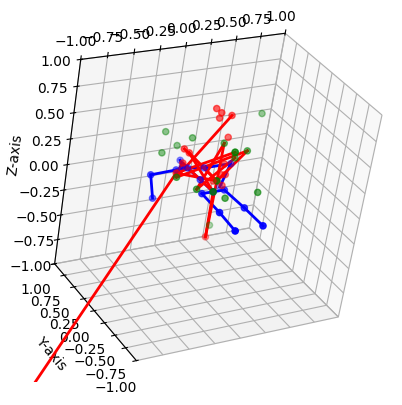

In [4]:
from matplotlib import pyplot as plt
from pysensing.mmwave.PC.tutorial.plot import plot_3d_graph_all
# Example of the samples in the dataset
index = 10  # Randomly select an index
pc,pose = train_dataset.__getitem__(index)
print(f"PC shape: {pc.shape if pc is not None else 'None'}, Type: {type(pc)}")
print(f"Pose shape: {pose.shape if pose is not None else 'None'}, Type: {type(pose)}")

# Check if pose is None before plotting
if pose is not None and pc is not None:
    plot_3d_graph_all(pose, pc[0])
else:
    print(f"Skipping plot for index {index} because pc or pose is None.")
    print("You might need to try a different index or check the dataset configuration/data availability.")

## Create model



mmBody utilizes P4Transformer model as a baseline hpe method. From model.hpe, we can import
desired hpe model designed for mmWave PC. The model parameter for P4transformer reimplemented
for mmBody is as follows:



In[7]:



In [5]:
from pysensing.mmwave.PC.model.hpe import PointTransformerReg
model = PointTransformerReg(
                    input_dim = 5,
                    nblocks = 5,
                    n_p = 17
                )
print(model)

PointTransformerReg(
  (backbone): Backbone(
    (fc1): Sequential(
      (0): Linear(in_features=5, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=32, bias=True)
    )
    (transformer1): TransformerBlock(
      (fc1): Linear(in_features=32, out_features=128, bias=True)
      (fc2): Linear(in_features=128, out_features=32, bias=True)
      (fc_delta): Sequential(
        (0): Linear(in_features=3, out_features=128, bias=True)
        (1): ReLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
      )
      (fc_gamma): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
      )
      (w_qs): Linear(in_features=128, out_features=128, bias=False)
      (w_ks): Linear(in_features=128, out_features=128, bias=False)
      (w_vs): Linear(in_features=128, out_features=128, bias=False)
    )
    (transition_downs): Modul

A shortcut for loading the hpe model to avoid the tedious hyper-parameter setting.



In[8]:



In [6]:
from pysensing.mmwave.PC.model.hpe import load_hpe_model
model = load_hpe_model("MetaFi", "PointTransformer")
print(model)

PointTransformerReg(
  (backbone): Backbone(
    (fc1): Sequential(
      (0): Linear(in_features=5, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=32, bias=True)
    )
    (transformer1): TransformerBlock(
      (fc1): Linear(in_features=32, out_features=128, bias=True)
      (fc2): Linear(in_features=128, out_features=32, bias=True)
      (fc_delta): Sequential(
        (0): Linear(in_features=3, out_features=128, bias=True)
        (1): ReLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
      )
      (fc_gamma): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
      )
      (w_qs): Linear(in_features=128, out_features=128, bias=False)
      (w_ks): Linear(in_features=128, out_features=128, bias=False)
      (w_vs): Linear(in_features=128, out_features=128, bias=False)
    )
    (transition_downs): Modul

## Model Train



pysensing library support quick training of model with the following steps. The training interface
incorporates pytorch loss functions, optimizers and dataloaders to facilate training.
An example is provided for how to define the aforemetioned terms.



In[11]:



In [7]:
# Create pytorch dataloaders
train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=16, num_workers=16)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=16)

# Define pytorch loss function as criterion
criterion = nn.CrossEntropyLoss()

# Define pytorch optimizer for training
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# GPU acceleration with cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


A quick training using hpe_train. The resulted model parameters will be saved into "train_{num_epochs}.pth".



In[12]:



In [8]:
# Pysensing training interface
from pysensing.mmwave.PC.inference.hpe import hpe_train
# hpe_train(model, train_loader, num_epochs=1, optimizer=optimizer, criterion=criterion, device=device)

## Model inference



Load the pretrained model, e.g. from train_1.pth, and perform human action recognition!



In[13]:



In [9]:
# load pretrained model
from pysensing.mmwave.PC.inference import load_pretrain
model = load_pretrain(model, "MetaFi", "PointTransformer").to(device)
model.eval()


Downloading: "https://pysensing.oss-ap-southeast-1.aliyuncs.com/pretrain/mmwave_pc/HPE/MetaFi_PointTransformer.pth" to /root/.cache/torch/hub/checkpoints/MetaFi_PointTransformer.pth


100%|██████████| 91.8M/91.8M [00:04<00:00, 21.2MB/s]


Use pretrained model!


PointTransformerReg(
  (backbone): Backbone(
    (fc1): Sequential(
      (0): Linear(in_features=5, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=32, bias=True)
    )
    (transformer1): TransformerBlock(
      (fc1): Linear(in_features=32, out_features=128, bias=True)
      (fc2): Linear(in_features=128, out_features=32, bias=True)
      (fc_delta): Sequential(
        (0): Linear(in_features=3, out_features=128, bias=True)
        (1): ReLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
      )
      (fc_gamma): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
      )
      (w_qs): Linear(in_features=128, out_features=128, bias=False)
      (w_ks): Linear(in_features=128, out_features=128, bias=False)
      (w_vs): Linear(in_features=128, out_features=128, bias=False)
    )
    (transition_downs): Modul

Test the model on testing dataset.

In [ ]:
from pysensing.mmwave.PC.inference.hpe import hpe_test
hpe_test(model, test_loader, criterion=criterion, device=device)

validation mpjpe:223.6271, loss:47.04038


Model inference on sample and deep feature embedding of input modality in HPE task.

In [10]:
# Model inference
idx = 5
points, pose= test_dataset.__getitem__(idx)
points = torch.tensor(points).unsqueeze(0).float().to(device)
predicted_result = model(points)
print("The predicted pose is {}, while the ground truth is {}".format(predicted_result.cpu(),pose))

# Deep feature embedding
from pysensing.mmwave.PC.inference.embedding import embedding
emb = embedding(input = points, model=model, dataset_name = "MetaFi", model_name = "PointTransformer", device=device)
print("The shape of feature embedding is: ", emb.shape)

The predicted pose is tensor([[[-0.0732, -0.0320,  2.8192],
         [-0.1610, -0.0239,  2.8217],
         [-0.1500,  0.3482,  2.8215],
         [-0.1503,  0.7307,  2.8390],
         [ 0.0712, -0.0892,  2.8306],
         [ 0.0469,  0.3171,  2.8479],
         [ 0.0531,  0.7271,  2.8484],
         [-0.0585, -0.3184,  2.8133],
         [-0.0409, -0.6009,  2.7986],
         [-0.0229, -0.7314,  2.7787],
         [-0.0215, -0.7764,  2.8044],
         [ 0.0928, -0.5512,  2.8026],
         [ 0.3014, -0.4980,  2.7939],
         [ 0.1892, -0.5354,  2.5988],
         [-0.1946, -0.5597,  2.8130],
         [-0.4262, -0.5528,  2.7339],
         [-0.2905, -0.5816,  2.5533]]], grad_fn=<ToCopyBackward0>), while the ground truth is tensor([[-8.5787e-02, -7.7896e-02,  3.0175e+00],
        [-1.9292e-01, -8.1096e-02,  3.0175e+00],
        [-1.7758e-01,  3.2295e-01,  3.0175e+00],
        [-1.7898e-01,  7.7592e-01,  3.0175e+00],
        [ 2.1350e-02, -7.4697e-02,  3.0175e+00],
        [ 1.6550e-02,  3.2295e-

## mmDiff: diffusion model for mmWave radar HPE

Load Diffusion Runner with model initialized. This process will define the setting for model and dataset. Currently two settings are implemented:
1. "mmBody + P4Transformer":
    Phase 1: Input [b, 4, 5000, 6]; Output: [b, 17, 3] and [b, 17, 64].
    Phase 2: GRC, LRC, TMC, SLC
2. "MetaFi + PointTransformer":
    Phase 1: Input [b, 5, 150, 5]; Output: [b, 17, 3] and [b, 17, 32].
    Phase 2: GRC, TMC, SLC

In [11]:
from pysensing.mmwave.PC.model.hpe.mmDiff.load_mmDiff import load_mmDiff
mmDiffRunner = load_mmDiff("MetaFi")

Self.model_feat vadility passes.
MMdiff using PointTransformer as feature extractor.


Phase 1 Training: Can train phase 1 from scratch (is_train = True) or load pretrained phase 1 model (is_train = False). Set is_save = True to facilitate phase 2 training acceleration.
If phase 1 features are saved, set is_save = False.


In [16]:
import os

# Define the directory path where the data needs to be saved
save_data_root = os.path.join(os.getcwd(), "mmdata2", "MetaFi", "MetaFi")

# Create the directory if it does not exist
os.makedirs(save_data_root, exist_ok=True)
print(f"Ensured directory exists: {save_data_root}")

mmDiffRunner.phase1_train(train_dataset, test_dataset, is_train=False, is_save=True)

Ensured directory exists: /content/mmDiffCorrect/mmdata2/MetaFi/MetaFi
Downloading: "https://pysensing.oss-ap-southeast-1.aliyuncs.com/pretrain/mmwave_pc/HPE/MetaFi_mmDiff_phase1.pth" to /root/.cache/torch/hub/checkpoints/MetaFi_mmDiff_phase1.pth


100%|██████████| 91.8M/91.8M [00:05<00:00, 18.4MB/s]


Phase 1 use pretrained model!


2.87626066948715 2.9360354011551384
Saving Test.
(33264, 17, 3)
(33264, 17, 3)
(33264, 17, 32)
(33264, 150, 5)


2.9743136272980615 2.984627677615435
Saving Train.
(8316, 17, 3)
(8316, 17, 3)
(8316, 17, 32)
(1664, 150, 5)
(1664, 150, 5)
(1664, 150, 5)
(1664, 150, 5)
(1660, 150, 5)


Phase 1 can also receive self defined model and the model should follow the setting defined above. The Self-defined model should output coarse joints and coarse joint features

In [17]:
# Self defined model should output coarse joints and coarse joint features
from pysensing.mmwave.PC.model.hpe.pointTrans import PointTransformerReg_feat
model = PointTransformerReg_feat(
                    input_dim = 5,
                    nblocks = 5,
                    n_p = 17
                )
print(model)

mmDiffRunner.phase1_train(train_dataset, test_dataset, model_self=model, is_train=False, is_save=False)

PointTransformerReg_feat(
  (backbone): Backbone(
    (fc1): Sequential(
      (0): Linear(in_features=5, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=32, bias=True)
    )
    (transformer1): TransformerBlock(
      (fc1): Linear(in_features=32, out_features=128, bias=True)
      (fc2): Linear(in_features=128, out_features=32, bias=True)
      (fc_delta): Sequential(
        (0): Linear(in_features=3, out_features=128, bias=True)
        (1): ReLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
      )
      (fc_gamma): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
      )
      (w_qs): Linear(in_features=128, out_features=128, bias=False)
      (w_ks): Linear(in_features=128, out_features=128, bias=False)
      (w_vs): Linear(in_features=128, out_features=128, bias=False)
    )
    (transition_downs): 

Phase 2 Training: Can train from scratch (is_train = True) or load pretrained phase 2 model (is_train = False).

In [18]:
mmDiffRunner.phase2_train(train_loader = None, is_train = False)

Phase 2 use pretrained model!


Testing mmDiff

Testing...
Generating 8316 poses...
Generating 33264 poses...
===Action=== ==p#1 mm== =p#2 mm=
Test         107.26      62.75
Average      107.26      62.75

Batch 0, Sample 0:
MPJPE: 85.8514 mm


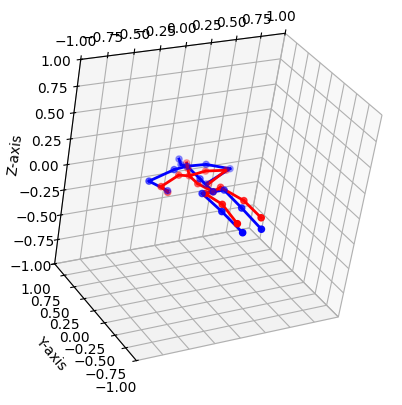


Batch 0, Sample 1:
MPJPE: 84.6220 mm


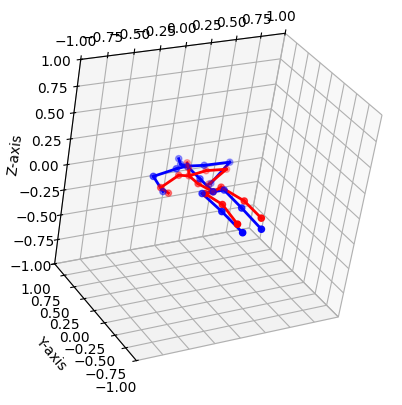

===Action=== ==p#1 mm== =p#2 mm=
Test         108.53      61.59
Average      108.53      61.59

Batch 1, Sample 0:
MPJPE: 102.0902 mm


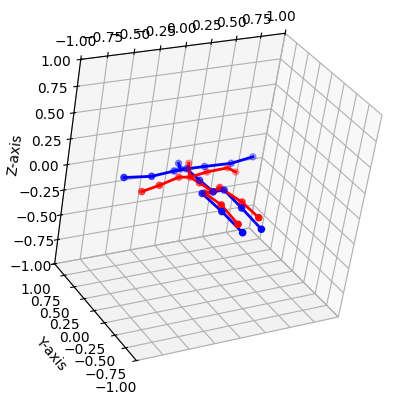


Batch 1, Sample 1:
MPJPE: 100.9622 mm


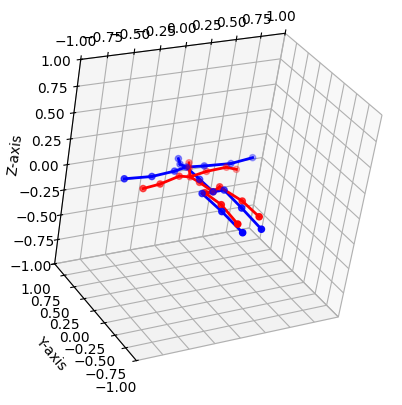

(2/260) Data: 3.725766s | MPJPE:  108.5317 | P-MPJPE:  61.5858
===Action=== ==p#1 mm== =p#2 mm=
Test         110.22      66.58
Average      110.22      66.58

Batch 2, Sample 0:
MPJPE: 98.6905 mm


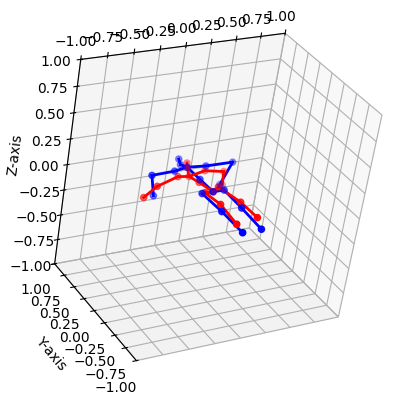


Batch 2, Sample 1:
MPJPE: 92.3916 mm


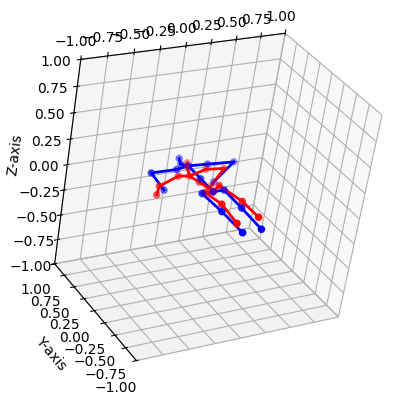

(3/260) Data: 7.275001s | MPJPE:  110.2243 | P-MPJPE:  66.5841
===Action=== ==p#1 mm== =p#2 mm=
Test         113.01      71.16
Average      113.01      71.16
(4/260) Data: 11.540206s | MPJPE:  113.0120 | P-MPJPE:  71.1647
===Action=== ==p#1 mm== =p#2 mm=
Test         113.93      72.72
Average      113.93      72.72
(5/260) Data: 15.948632s | MPJPE:  113.9285 | P-MPJPE:  72.7181
===Action=== ==p#1 mm== =p#2 mm=
Test         113.48      71.99
Average      113.48      71.99
(6/260) Data: 20.471781s | MPJPE:  113.4827 | P-MPJPE:  71.9930
===Action=== ==p#1 mm== =p#2 mm=
Test         113.07      71.20
Average      113.07      71.20
(7/260) Data: 25.104805s | MPJPE:  113.0710 | P-MPJPE:  71.2042
===Action=== ==p#1 mm== =p#2 mm=
Test         112.25      69.81
Average      112.25      69.81
(8/260) Data: 29.875921s | MPJPE:  112.2526 | P-MPJPE:  69.8127
===Action=== ==p#1 mm== =p#2 mm=
Test         111.40      68.73
Average      111.40      68.73
(9/260) Data: 34.773890s | MPJPE:  111.3998 | P

(107.51693750973101, np.float32(72.39385))

In [19]:
mmDiffRunner.test()

## Dataset with mmBody

In [ ]:
from pysensing.mmwave.PC.dataset.hpe import load_hpe_dataset
# The path contains the radHAR dataset
root =  '/home/junqiao/projects/data/mmpose/'
train_dataset, test_dataset = load_hpe_dataset("mmBody", root)

using dataset: mmBody DATA


torch.Size([4, 5184, 6]) <class 'torch.Tensor'>


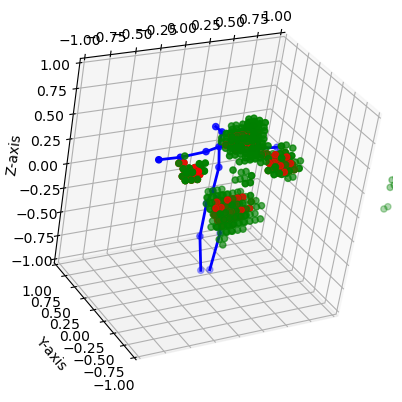

In [ ]:
from matplotlib import pyplot as plt
from pysensing.mmwave.PC.tutorial.plot import plot_3d_graph
# Example of the samples in the dataset
index = 10  # Randomly select an index
pc,pose = train_dataset.__getitem__(index)
print(pc.shape, type(pose))
plot_3d_graph(pose, pc[0])

In [ ]:
from pysensing.mmwave.PC.model.hpe import load_hpe_model
model = load_hpe_model("mmBody", "P4Transformer")
print(model)

P4Transformer(
  (tube_embedding): P4DConv(
    (conv_d): Sequential(
      (0): Conv2d(4, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
    (conv_f): Sequential(
      (0): Conv2d(3, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
    (mlp): Sequential()
  )
  (pos_embedding): Conv1d(4, 1024, kernel_size=(1,), stride=(1,))
  (transformer): Transformer(
    (layers): ModuleList(
      (0): ModuleList(
        (0): Residual(
          (fn): PreNorm(
            (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (fn): Attention(
              (to_k): Linear(in_features=1024, out_features=2048, bias=False)
              (to_v): Linear(in_features=1024, out_features=2048, bias=False)
              (to_q): Linear(in_features=1024, out_features=2048, bias=False)
              (to_out): Sequential(
                (0): Linear(in_features=2048, out_features=1024, bias=True)
                (1): GELU(approximate='none')
                (2): Dropou

In [ ]:
# Create pytorch dataloaders
train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=16, num_workers=16)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=16)

# Define pytorch loss function as criterion
criterion = nn.CrossEntropyLoss()

# Define pytorch optimizer for training
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# GPU acceleration with cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# load pretrained model
from pysensing.mmwave.PC.inference import load_pretrain
model = load_pretrain(model, "mmBody", "P4Transformer").to(device)
model.eval()


Use pretrained model!


P4Transformer(
  (tube_embedding): P4DConv(
    (conv_d): Sequential(
      (0): Conv2d(4, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
    (conv_f): Sequential(
      (0): Conv2d(3, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
    (mlp): Sequential()
  )
  (pos_embedding): Conv1d(4, 1024, kernel_size=(1,), stride=(1,))
  (transformer): Transformer(
    (layers): ModuleList(
      (0): ModuleList(
        (0): Residual(
          (fn): PreNorm(
            (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (fn): Attention(
              (to_k): Linear(in_features=1024, out_features=2048, bias=False)
              (to_v): Linear(in_features=1024, out_features=2048, bias=False)
              (to_q): Linear(in_features=1024, out_features=2048, bias=False)
              (to_out): Sequential(
                (0): Linear(in_features=2048, out_features=1024, bias=True)
                (1): GELU(approximate='none')
                (2): Dropou

In [ ]:
from pysensing.mmwave.PC.inference.hpe import hpe_test
# hpe_test(model, test_loader, criterion=criterion, device=device)

## mmDiff: diffusion model for mmWave radar HPE

In [ ]:
from pysensing.mmwave.PC.model.hpe.mmDiff.load_mmDiff import load_mmDiff
mmDiffRunner = load_mmDiff("mmBody")

Self.model_feat vadility passes.
MMdiff using P4Transformer as feature extractor.


In [ ]:
mmDiffRunner.phase1_train(train_dataset, test_dataset, is_train=False, is_save=True)

Phase 1 use pretrained model!


0.004061146462196378 0.07767320130147597
Saving Test.
(28109, 17, 3)
(28109, 17, 3)
(28109, 17, 64)
(28109, 5184, 6)


0.0018360977943928493 0.04909694526253224
Saving Train.
(39892, 17, 3)
(39892, 17, 3)
(39892, 17, 64)
(7979, 5184, 6)
(7979, 5184, 6)
(7979, 5184, 6)
(7979, 5184, 6)
(7976, 5184, 6)


In [ ]:
mmDiffRunner.phase2_train(train_loader = None, is_train = False)

Phase 2 use pretrained model!


In [ ]:
mmDiffRunner.test()

Testing...
Generating 39892 poses...
Generating 28109 poses...
===Action=== ==p#1 mm== =p#2 mm=
Test          47.86      30.63
Average       47.86      30.63
===Action=== ==p#1 mm== =p#2 mm=
Test          47.34      28.99
Average       47.34      28.99
(2/220) Data: 85.460025s | MPJPE:  47.3396 | P-MPJPE:  28.9870
===Action=== ==p#1 mm== =p#2 mm=
Test          52.92      34.35
Average       52.92      34.35
(3/220) Data: 128.533537s | MPJPE:  52.9226 | P-MPJPE:  34.3528
===Action=== ==p#1 mm== =p#2 mm=
Test          57.30      41.20
Average       57.30      41.20
(4/220) Data: 171.808520s | MPJPE:  57.3030 | P-MPJPE:  41.1966
===Action=== ==p#1 mm== =p#2 mm=
Test          57.92      42.85
Average       57.92      42.85
(5/220) Data: 215.282359s | MPJPE:  57.9161 | P-MPJPE:  42.8537
===Action=== ==p#1 mm== =p#2 mm=
Test          60.30      45.23
Average       60.30      45.23
(6/220) Data: 258.953604s | MPJPE:  60.3036 | P-MPJPE:  45.2285
===Action=== ==p#1 mm== =p#2 mm=
Test          6

(69.89549974051093, 55.062307693400044)